In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from modeling.models.bethge import BethgeModel
from modeling.train_utils import array_to_dataloader
from scipy.stats import spearmanr
from scripts.visualize_SharedCore import visualize_neuron
from scipy import optimize
import os

In [2]:
site = 'm2s1'
nb_validation_samples = 1000
nb_training_samples = 49000

batch_size = 2048

train_y = np.load('D:/school/research/CNN_Tang_project/data/Processed_Tang_data/all_sites_data_prepared/New_response_data/trainRsp_'+site+'.npy')
num_neurons = train_y.shape[1]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

channels = 256
num_layers = 9
input_size = 50
output_size = num_neurons
first_k = 9
later_k = 3
pool_size = 2
factorized = True

num_maps = 1

net = BethgeModel(channels=channels, num_layers=num_layers, input_size=input_size,
                  output_size=output_size, first_k=first_k, later_k=later_k,
                  input_channels=1, pool_size=pool_size, factorized=True,
                  num_maps=num_maps).cuda()

net.to(device)
net.load_state_dict(torch.load(f'D:/school/research/CNN_Tang_project/saved_models/new_learned_models/{site}_9_model_version_0'))

<All keys matched successfully>

In [12]:
data = np.load('D:/school/research/CNN_Tang_project/data/JFtextures_crop240_finalsize50_allcombine.npy', allow_pickle=True).item()

In [18]:
imgSet = np.reshape(data['allimgs'], (450,1,50,50))
from torch.utils.data import TensorDataset, DataLoader
imgloader = DataLoader(TensorDataset(torch.FloatTensor(imgSet)))
rsp = []
for img in tqdm(imgloader):
    x = img[0].to(device)
    outputs = net(x).detach().cpu().numpy()
    rsp.extend(outputs)


100%|██████████| 450/450 [00:02<00:00, 177.01it/s]


In [21]:
rsp = np.array(rsp)
print(rsp)

[[0.03555888 0.04184179 0.03092879 ... 0.06335369 0.20503747 0.0578519 ]
 [0.05834064 0.04676326 0.03672788 ... 0.07911143 0.22036076 0.08286642]
 [0.03068896 0.03478478 0.02315166 ... 0.04938272 0.17474112 0.07002813]
 ...
 [0.06221464 0.06886823 0.04302642 ... 0.11206459 0.25097632 0.07389782]
 [0.03294101 0.04399563 0.03126695 ... 0.06424507 0.12991707 0.04160488]
 [0.03111311 0.04805603 0.0254949  ... 0.05892004 0.1422931  0.05985096]]


(array([[447.,   3.,   0., ...,   0.,   0.,   0.],
        [441.,   9.,   0., ...,   0.,   0.,   0.],
        [450.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [344., 106.,   0., ...,   0.,   0.,   0.],
        [  3., 117., 236., ...,   0.,   0.,   0.],
        [361.,  89.,   0., ...,   0.,   0.,   0.]]),
 array([0.00289336, 0.07734877, 0.15180418, 0.22625959, 0.300715  ,
        0.3751704 , 0.4496258 , 0.52408123, 0.5985366 , 0.67299205,
        0.74744743], dtype=float32),
 <a list of 299 BarContainer objects>)

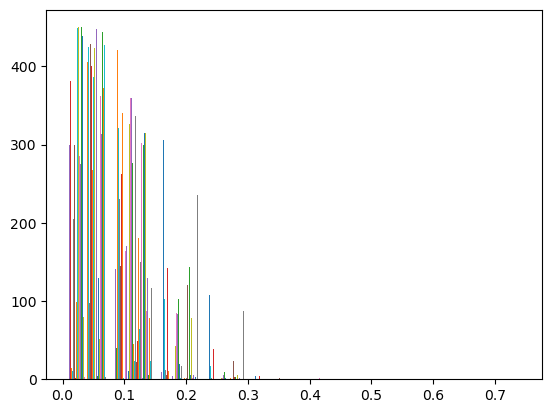

In [22]:
plt.hist(rsp)

In [23]:
np.save("textureRsp", rsp)